Big Mart sales prediction

workflow:
1. Data collection
2. Data pre processing 
3. Data analysis
4. train test split
5. XGBRegressor model training
6. model evaluation


In [233]:
# Importing the dependencies
import numpy as np # numpy arrays
import pandas as pd #pandas Dataframe

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics # R squared
from lazypredict.Supervised import LazyRegressor
import warnings
warnings.filterwarnings('ignore')

Data collection % analysis

In [234]:
# uploading dataset into pandas Dataframe
big_mart_data = pd.read_csv('Train_data_Bigmart.csv')

In [235]:
# print 5 rows of dataset
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [236]:
# number of data points % number of features
big_mart_data.shape

(8523, 12)

In [237]:
# good size dataset

In [238]:
# info about dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Location_Type
- Item_Outlet_Sales

In [239]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing vlaues using mean and mode

In [240]:
# mean value of "Item_weight" column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [241]:
# filling the missing values in 'Item_Weight' with Mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace = True)

In [242]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [243]:
# filling the missing values in 'Outlet_Size' with Mode value
mode_of_outlet_size = big_mart_data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [244]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [245]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [246]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [247]:
#big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size) # fill missing values in 'Outlet_Size'
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x].Outlet_Size)

In [248]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [249]:
# statistical measures of dataset
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.55,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


Numerical features

In [250]:
sns.set()

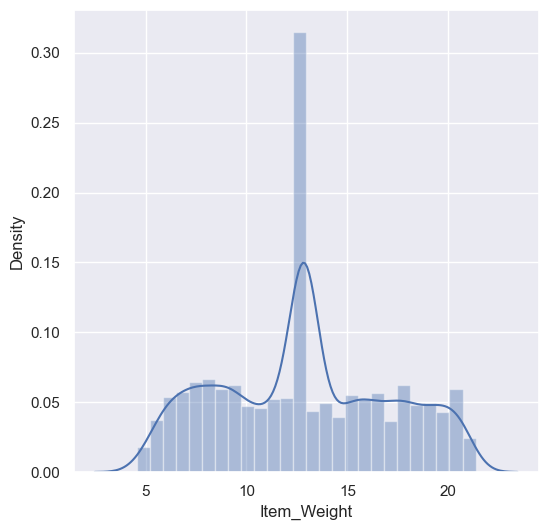

In [251]:
# Item_Weight distibution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

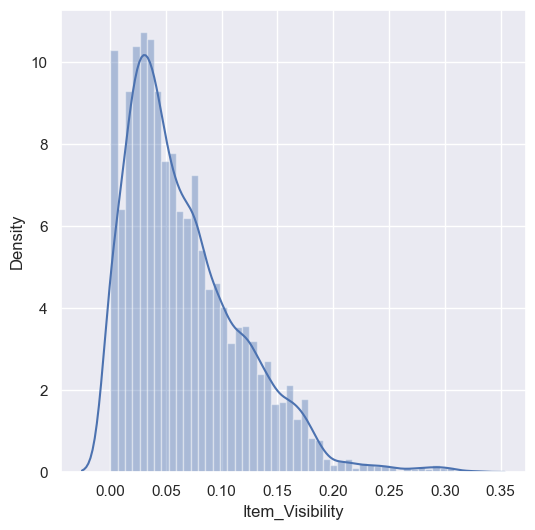

In [252]:
# Item_Visibility distibution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

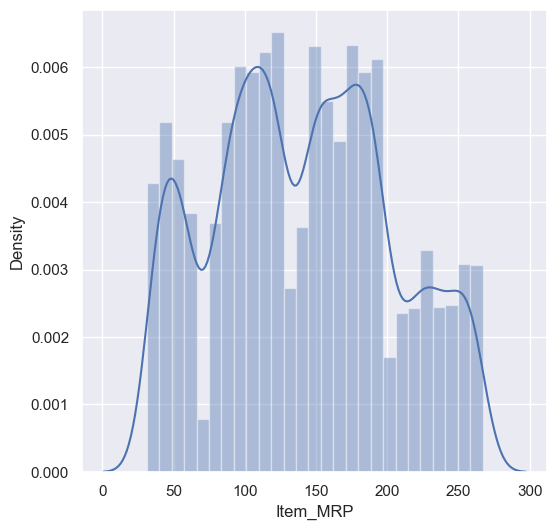

In [253]:
# Item_MRP distibution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

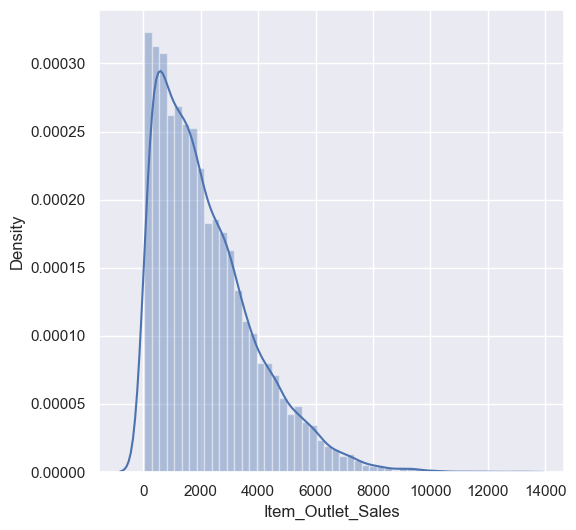

In [254]:
# Item_Outlet_Sales distibution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

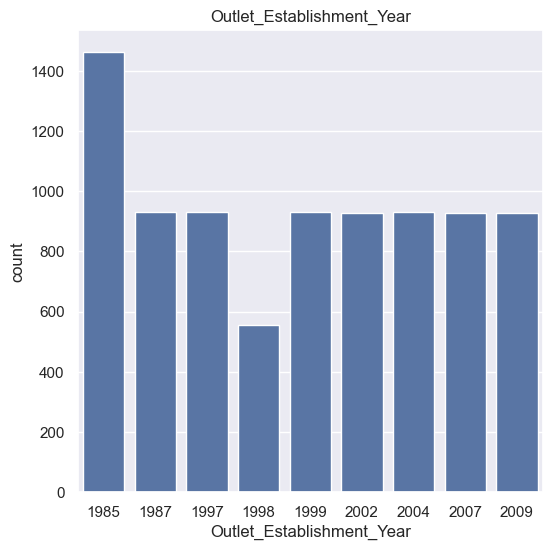

In [255]:
# Outlet_Establishment_Year plot
plt.figure(figsize=(6,6))
sns.countplot(x= 'Outlet_Establishment_Year', data = big_mart_data)
plt.title('Outlet_Establishment_Year')
plt.show()

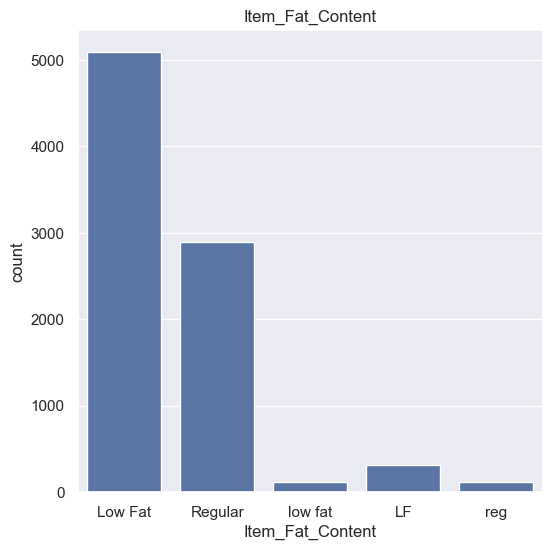

In [256]:
# Item_Fat_Content plot
plt.figure(figsize=(6,6))
sns.countplot(x= 'Item_Fat_Content', data = big_mart_data)
plt.title('Item_Fat_Content')
plt.show()

In [257]:
# need to clean the Item_Fat_Content for duplicate entries of different references

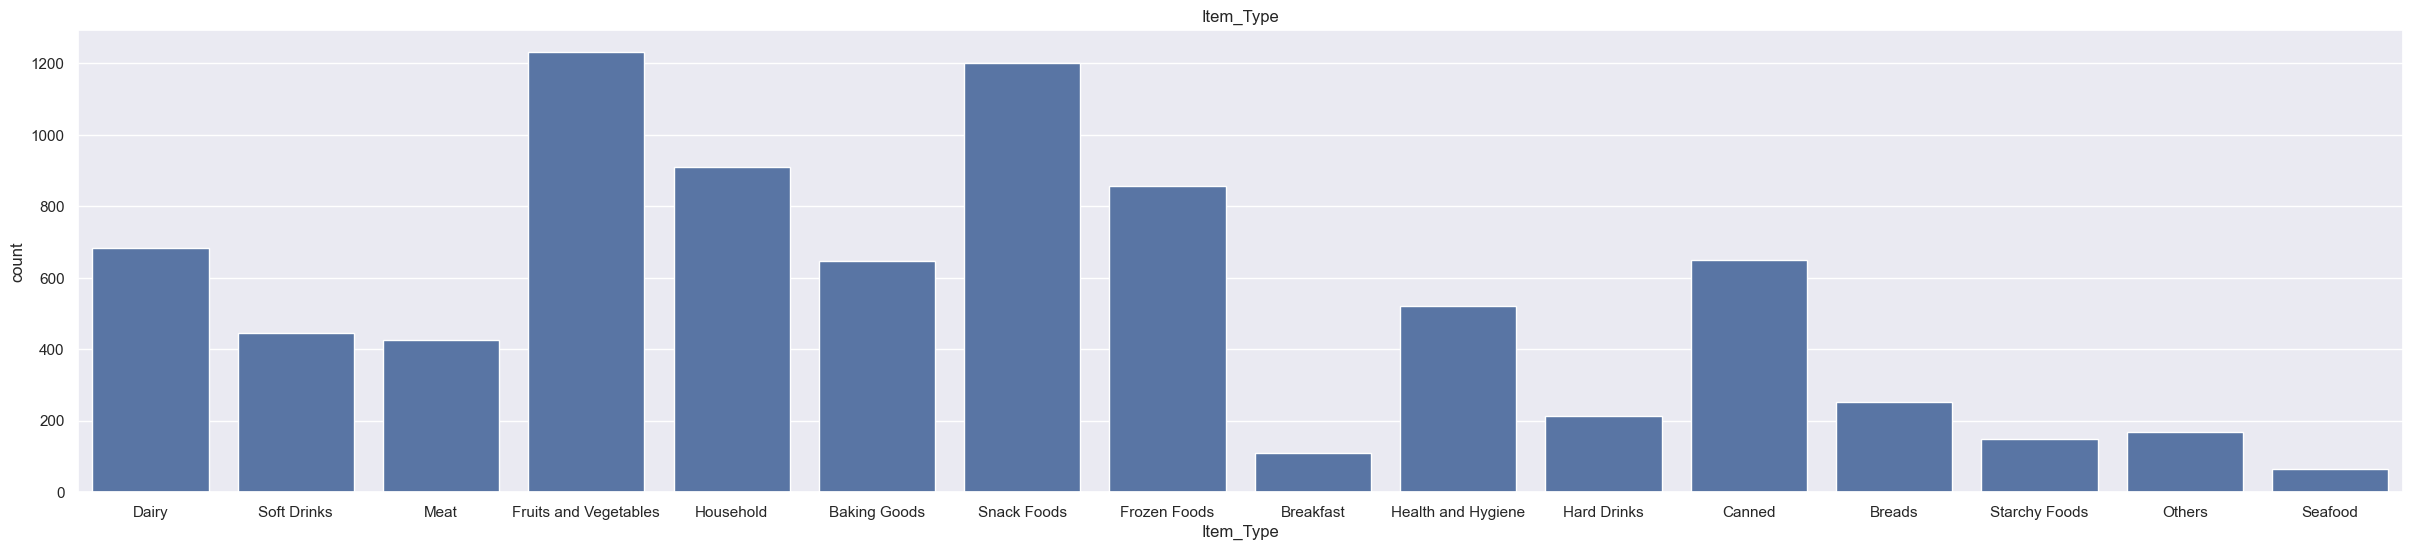

In [258]:
# Item_Type plot
plt.figure(figsize=(30,6))
sns.countplot(x= 'Item_Type', data = big_mart_data)
plt.title('Item_Type')
plt.show()

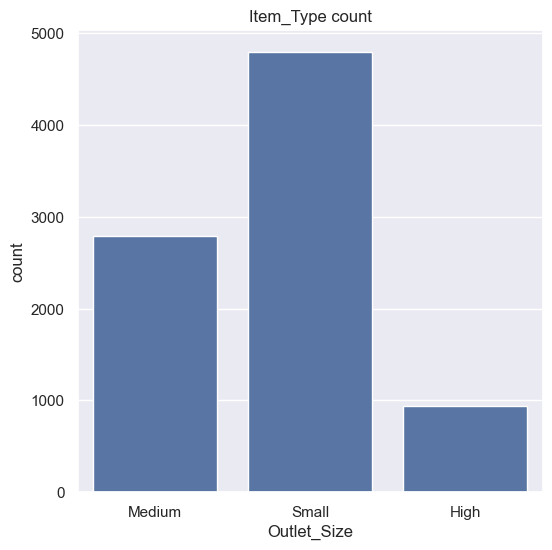

In [259]:
# Outlet_Size plot
plt.figure(figsize=(6,6))
sns.countplot(x= 'Outlet_Size', data = big_mart_data)
plt.title('Item_Type count')
plt.show()

Data pre processing

In [260]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,Small,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


merging entries in Item_Fat_Contentwith same type but different label

In [261]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [262]:
big_mart_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True) # merging entries with same type but different label

In [263]:
big_mart_data['Item_Fat_Content'].value_counts() # checking

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label encoding: convert categorical values into numerical values

In [264]:
encoder = LabelEncoder()

In [265]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

In [266]:
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

In [267]:
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

In [268]:
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

In [269]:
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

In [270]:
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [271]:
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

In [272]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.02,4,249.81,9,1999,1,0,1,3735.14
1,8,5.92,1,0.02,14,48.27,3,2009,1,2,2,443.42
2,662,17.50,0,0.02,10,141.62,9,1999,1,0,1,2097.27
3,1121,19.20,1,0.00,6,182.09,0,1998,2,2,0,732.38
4,1297,8.93,0,0.00,9,53.86,1,1987,0,2,1,994.71


Splitting feature and target

In [273]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [274]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156         9.30                 0             0.02   
1                   8         5.92                 1             0.02   
2                 662        17.50                 0             0.02   
3                1121        19.20                 1             0.00   
4                1297         8.93                 0             0.00   
...               ...          ...               ...              ...   
8518              370         6.87                 0             0.06   
8519              897         8.38                 1             0.05   
8520             1357        10.60                 0             0.04   
8521              681         7.21                 1             0.15   
8522               50        14.80                 0             0.04   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4    249.81                  9    

In [275]:
print(Y)

0      3735.14
1       443.42
2      2097.27
3       732.38
4       994.71
         ...  
8518   2778.38
8519    549.28
8520   1193.11
8521   1845.60
8522    765.67
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Train test split

In [276]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [277]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Model training

In [278]:
# using XGBRegressor
xgb_regressor = XGBRegressor()

In [279]:
xgb_regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

XGBRegressor Model Evaluation

In [280]:
# prediction on training data
training_data_prediction = xgb_regressor.predict(X_train)

In [281]:
# R squared value of prediction on training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [282]:
print('R squared value of prediction on training data : ', r2_train)

R squared value of prediction on training data :  0.8762174618111388


In [283]:
# prediction on test data
test_data_prediction = xgb_regressor.predict(X_test)

In [284]:
# R squared value of prediction on test data
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [285]:
print('R squared value of prediction on test data : ', r2_test)

R squared value of prediction on test data :  0.5017253991620692


In [288]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:25<00:00,  1.68it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1017
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 11
[LightGBM] [Info] Start training from score 2167.583481
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
GradientBoostingRegressor                    0.58       0.59  1130.26   
LGBMRegressor                                0.57       0.57  1149.28   
HistGradientBoostingRegressor                0.57       0.57  1150.62   
MLPRegressor                                 0.56       0.56  1165.07   
RandomForestRegressor                        0.55       0.55  1175.42   
ExtraTreesRegressor                          0.53       0.53  1207.02   
BaggingR